# Clustering
    Clustering is a form of un-supervised learning, meaning we do not have/or consider the labels of the data we analyze. We instead look at the structure of the data, find patterns or behaviuour.

### K-means
    - Randomly pick k centroids
    - Assign each point to the nearest centroid
    - Move the centroids to the center(mean) of the points assigned to it
    - Repeat 2 and 3 until centroid positions do not change (or until w/n cluster variation is minimized)

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set_palette('pastel')

In [162]:
df = pd.read_csv('bc_data.csv')
df = df.drop(['Unnamed: 32'],axis=1)

In [163]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

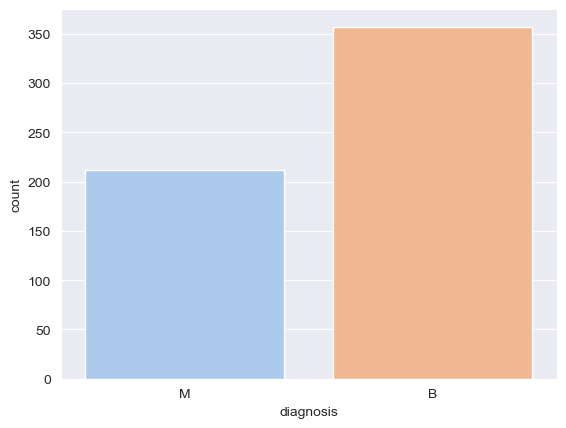

In [67]:
sns.countplot(x=df['diagnosis'])

In [68]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

## 1. Dimensionality Reduce

In [69]:
X = df.drop('diagnosis',axis=1)

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

scale = scaler.transform(X)

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scale)
x_pca = pca.transform(scale)

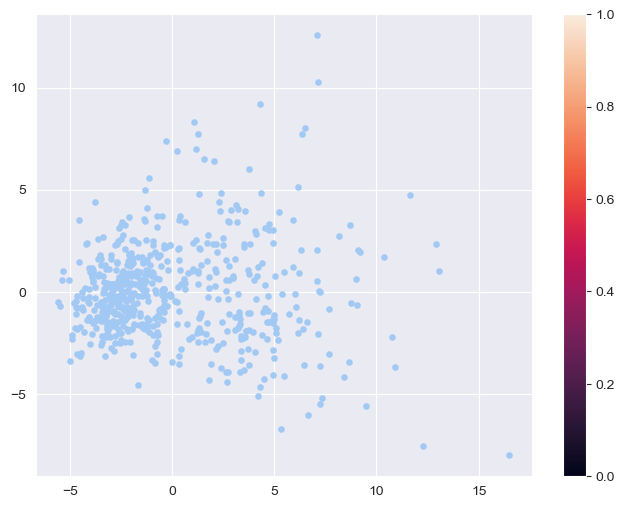

In [73]:
plt.figure(figsize=(8,6)) 
plt.scatter(x_pca[:,0],x_pca[:,1],s=14,alpha=1)
plt.colorbar()

## 2. Run Kmeans 

In [74]:
X = x_pca

In [75]:
from sklearn.cluster import KMeans


km = KMeans(n_clusters=2, 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

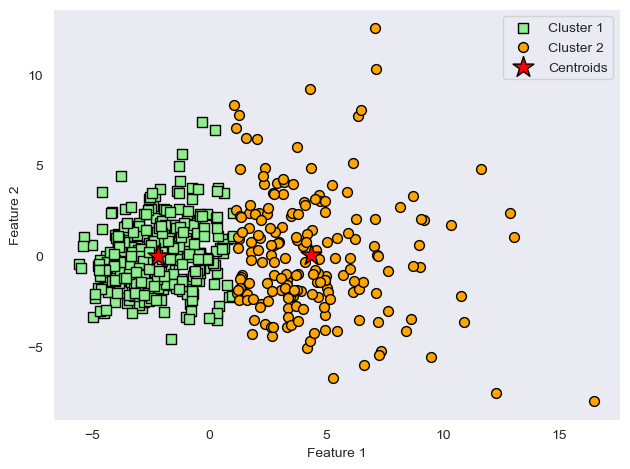

In [77]:
plt.scatter(X[y_km == 0, 0],
                X[y_km == 0, 1],
                s=50, c='lightgreen',
                marker='s', edgecolor='black',
                label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
                X[y_km == 1, 1],
                s=50, c='orange',
                marker='o', edgecolor='black',
                label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0],
                km.cluster_centers_[:, 1],
                s=250, marker='*',
                c='red', edgecolor='black',
                label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()

In [105]:
print(f'Distortion: {km.inertia_:.2f}')

Distortion: 5338.16


## 3. Evaluate - Overlay the actual labels 

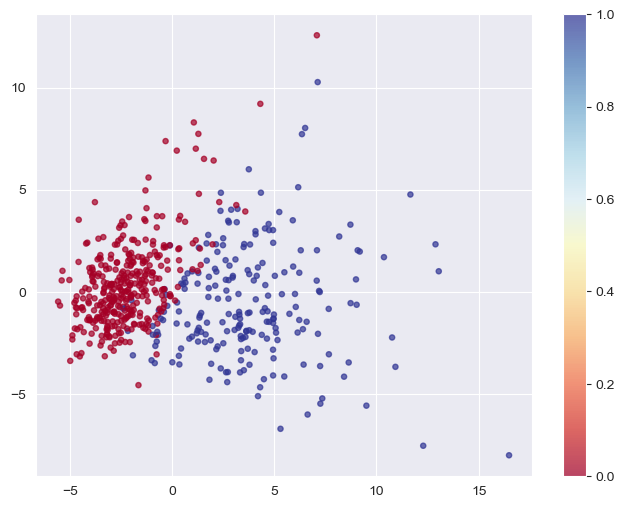

In [86]:
plt.figure(figsize=(8,6)) 
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['diagnosis'],cmap='RdYlBu',s=14,alpha=.7)
plt.colorbar()

In [113]:
results = pd.concat([pd.Series(km.predict(X)),df['diagnosis']],axis=1)
results.columns = ['predicted','actual']

In [138]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(results.iloc[:, 0],results.iloc[:, 1])
cm

array([[341,  37],
       [ 16, 175]])

<AxesSubplot:>

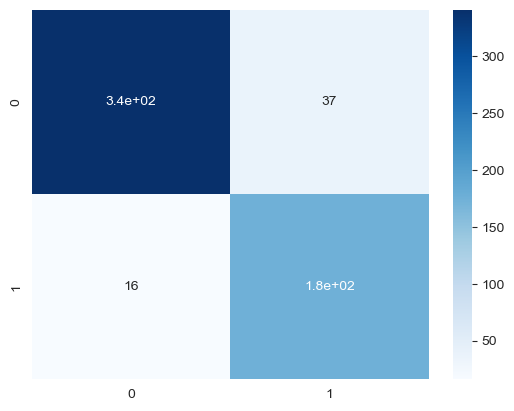

In [139]:
sns.color_palette("mako", as_cmap=True)
sns.heatmap(cm,annot=True,cmap="Blues")

## 4 Predict New Data

1. New patient samples come in and we take the 31 measurements
2. We run a PCA decomp on their data (down to 2 dimensions)
3. We use our trained Kmeans model to predict their diagnosis
4. We give them a diagnosis label based on this prediction {'M': 1, 'B': 0}

In [143]:
df.drop('diagnosis',axis=1).head(0)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [164]:
new_patient1 = [-3,10]
new_patient2 = [-2.58300457,  0.581270]
new_patient3 = [ 2.38330766, -3.75345876]

In [167]:
km.predict([new_patient3])

array([1], dtype=int32)

In [146]:
km.predict([new_patient1])

array([0], dtype=int32)

In [147]:
km.predict([new_patient2])

array([1], dtype=int32)

In [85]:
# from sklearn.cluster import DBSCAN


# db = DBSCAN(eps=.63, min_samples=5, metric='euclidean')
# y_db = db.fit_predict(X)
# plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
#             c='lightblue', marker='o', s=40,
#             edgecolor='black', 
#             label='Cluster 1')
# plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
#             c='red', marker='s', s=40,
#             edgecolor='black', 
#             label='Cluster 2')

# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')

# plt.legend()
# plt.tight_layout()